# Projeto Final - Data Science Experience
# Lead Scoring para a empresa fictícia X Education
# Autor: Davi Sasso
# Data: 04/04/2025

# ==========================================================
# Etapa 1: Entendimento do Negócio
# ==========================================================

# No contexto do marketing digital, leads são potenciais clientes que demonstraram algum interesse
# por um produto ou serviço, geralmente fornecendo informações como nome, e-mail ou telefone.
# Esses leads podem chegar por meio de campanhas, formulários, mídias sociais, etc.

# O grande desafio é que nem todos os leads têm o mesmo potencial de conversão.
# Muitos deles nunca se tornam clientes, o que gera custos e desperdício de tempo para o time de vendas.

# Neste projeto, o objetivo foi construir um modelo de machine learning supervisionado
# capaz de prever a probabilidade de um lead se converter em cliente.
# Com base nessa probabilidade, cada lead recebe um "lead score" que permite priorizar os mais promissores.

# A proposta é utilizar essa solução para:
# - Automatizar o ranqueamento dos leads
# - Ajudar o time comercial a focar em leads com maior probabilidade de conversão
# - Reduzir tempo e custo de aquisição de clientes
# - Integrar o modelo a CRMs ou ferramentas de automação de marketing

# Para alcançar esse resultado, seguimos a metodologia CRISP-DM e utilizamos algoritmos de classificação supervisionada.
# O foco principal foi transformar dados históricos em uma solução prática e aplicável no processo de conversão.

# A variável alvo (target) utilizada foi 'Converted', que indica se o lead foi convertido (1) ou não (0).

# As próximas etapas detalham o entendimento dos dados, preparação, modelagem e geração do lead score.

# ==========================================================
# Etapa 2: Entendimento dos Dados
# ==========================================================

# Nesta etapa, iniciamos o processo de exploração da base de dados bruta.
# O dataset contém 9.240 registros (leads) e 37 variáveis, incluindo informações como:
# - Origem do lead (e.g. Google, Landing Page, Chat)
# - Comportamento no site (visitas, tempo de navegação, páginas vistas)
# - Preferências e ocupação
# - Interações anteriores com a empresa

# A variável target é 'Converted' (0 = não convertido, 1 = convertido).
# Nossa missão nesta fase foi:
# • Verificar tipos de variáveis (numéricas e categóricas)
# • Identificar valores ausentes (nulls)
# • Entender a distribuição da variável alvo
# • Analisar a quantidade de valores únicos por coluna
# • Levantar insights iniciais com gráficos e estatísticas

# Essa etapa é essencial para identificar possíveis problemas nos dados, guiar o pré-processamento
# e levantar hipóteses sobre o comportamento dos leads que convertem.

# Observação: a divisão entre treino e teste será feita após essa etapa, para evitar qualquer viés
# ou overfitting precoce durante a análise exploratória.

In [1]:
# Importação de bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# Configurações para visualização
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
# Download e leitura dos dados
path = kagglehub.dataset_download("amritachatterjee09/lead-scoring-dataset")
print("Path to dataset files:", path)

100%|██████████| 411k/411k [00:00<00:00, 19.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/amritachatterjee09/lead-scoring-dataset/versions/2


In [4]:
# Verificando o nome exato do arquivo CSV baixado
for file in os.listdir(path):
    print(file)

Leads Data Dictionary.xlsx
Lead Scoring.csv


In [5]:
# Lendo o dataset
df = pd.read_csv(os.path.join(path, "Lead Scoring.csv"))

In [6]:
# Visualizando as 5 primeiras linhas
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:

# ==========================================================
print("="*60)
print("Etapa 2: Entendimento dos Dados e Split Inicial")
print("="*60)

# Carregando os dados e separando variável target
X = df.drop('Converted', axis=1)
y = df['Converted']

# Realizando o train-test split logo após a leitura dos dados para evitar overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"A base de treino contém {X_train.shape[0]} registros.")
print(f"A base de teste contém {X_test.shape[0]} registros.")

Etapa 2: Entendimento dos Dados e Split Inicial
A base de treino contém 6468 registros.
A base de teste contém 2772 registros.


# ==========================================================
# Etapa 3: Preparação dos Dados + Análise Exploratória (EDA)
# ==========================================================

# Esta etapa une duas partes fundamentais: a preparação dos dados para modelagem
# e a análise exploratória para gerar insights e guiar decisões futuras.

# Primeiro, aplicamos técnicas de EDA para:
# - Compreender a distribuição das variáveis numéricas (histogramas, boxplots)
# - Avaliar relações com a variável target (gráficos bivariados)
# - Observar padrões e correlações (heatmaps)

# Em paralelo, já iniciamos o tratamento de problemas comuns em datasets reais:
# - Presença de valores nulos
# - Valores inconsistentes (como o texto 'Select' em variáveis categóricas)
# - Colunas com baixa variabilidade ou sem relevância para o modelo

# A EDA ajuda a responder perguntas como:
# • Quais variáveis parecem estar associadas com a conversão?
# • Quais colunas têm muitos valores faltantes?
# • Há outliers ou padrões inesperados?

# Tudo isso serve para preparar o terreno para a próxima etapa: a limpeza e pré-processamento final.

In [8]:
# Verificando o shape do dataset
print("Formato do dataset:", df.shape)

Formato do dataset: (9240, 37)


In [9]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Estatísticas descritivas para variáveis numéricas
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
# Verificando valores nulos
nulls = df.isnull().sum().sort_values(ascending=False)
print("Valores nulos por coluna:\n", nulls[nulls > 0])

Valores nulos por coluna:
 Lead Quality                                     4767
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
dtype: int64


In [12]:
# Verificando valores únicos em variáveis categóricas
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} valores únicos")

Prospect ID: 9240 valores únicos
Lead Origin: 5 valores únicos
Lead Source: 21 valores únicos
Do Not Email: 2 valores únicos
Do Not Call: 2 valores únicos
Last Activity: 17 valores únicos
Country: 38 valores únicos
Specialization: 19 valores únicos
How did you hear about X Education: 10 valores únicos
What is your current occupation: 6 valores únicos
What matters most to you in choosing a course: 3 valores únicos
Search: 2 valores únicos
Magazine: 1 valores únicos
Newspaper Article: 2 valores únicos
X Education Forums: 2 valores únicos
Newspaper: 2 valores únicos
Digital Advertisement: 2 valores únicos
Through Recommendations: 2 valores únicos
Receive More Updates About Our Courses: 1 valores únicos
Tags: 26 valores únicos
Lead Quality: 5 valores únicos
Update me on Supply Chain Content: 1 valores únicos
Get updates on DM Content: 1 valores únicos
Lead Profile: 6 valores únicos
City: 7 valores únicos
Asymmetrique Activity Index: 3 valores únicos
Asymmetrique Profile Index: 3 valores ún

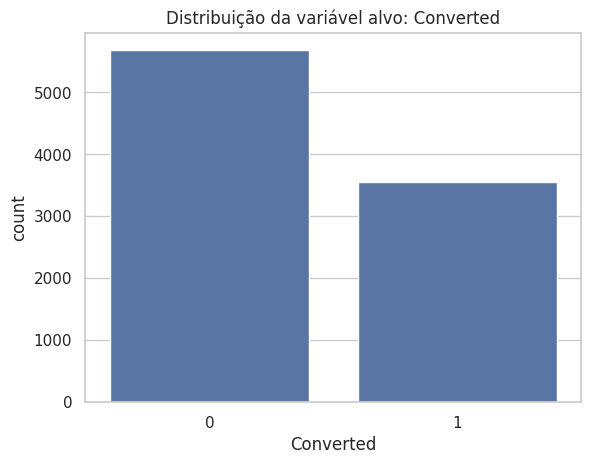

In [13]:
# Contagem de classes da variável alvo
sns.countplot(data=df, x='Converted')
plt.title("Distribuição da variável alvo: Converted")
plt.show()

In [14]:
# Taxa de conversão
conversion_rate = df['Converted'].mean()
print(f"Taxa de conversão geral: {conversion_rate:.2%}")

Taxa de conversão geral: 38.54%


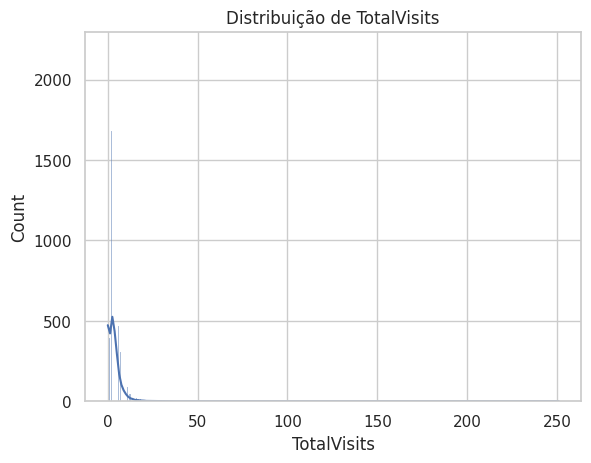

In [15]:
# Análise univariada - Exemplo: TotalVisits
sns.histplot(df['TotalVisits'].dropna(), kde=True)
plt.title("Distribuição de TotalVisits")
plt.show()

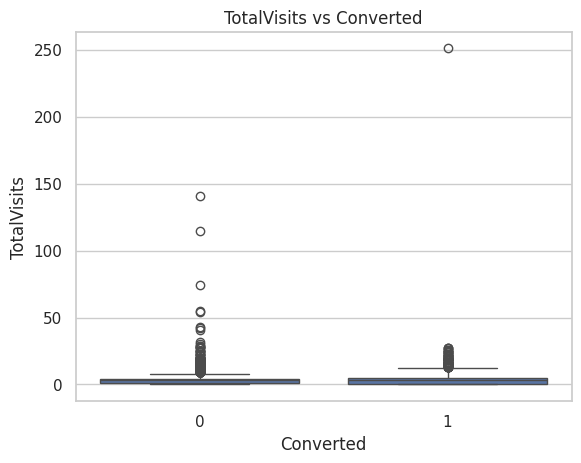

In [16]:
# Análise bivariada - TotalVisits vs Converted
sns.boxplot(x='Converted', y='TotalVisits', data=df)
plt.title("TotalVisits vs Converted")
plt.show()

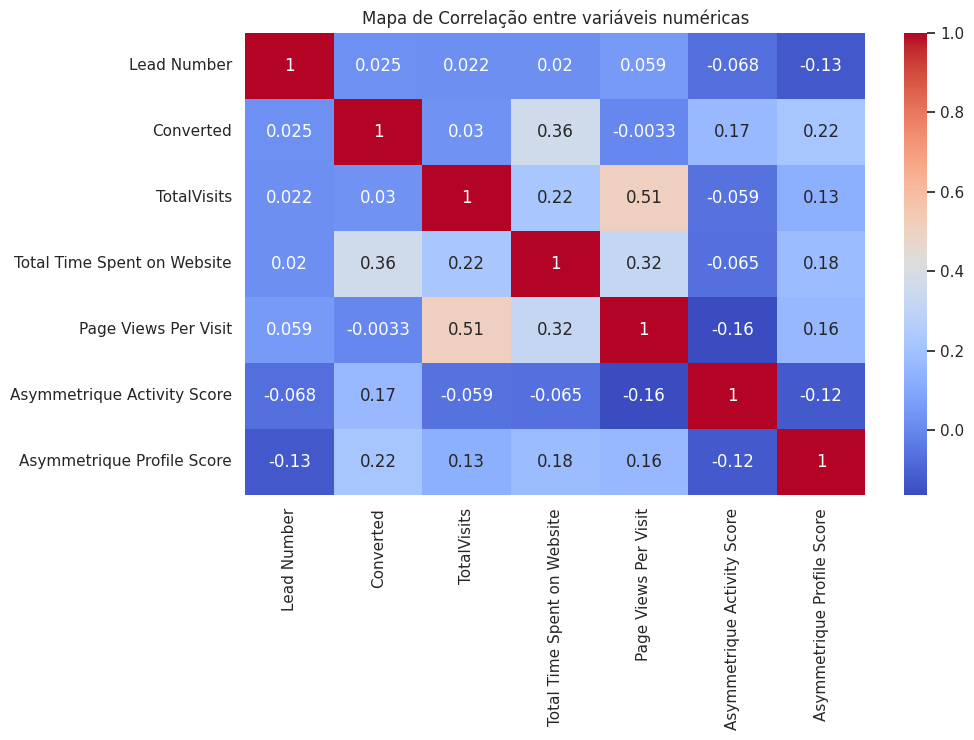

In [17]:
# Análise multivariada - Correlação entre variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação entre variáveis numéricas")
plt.show()


Top 10 fontes de lead:


,count
Lead Source,
Google,2004
Direct Traffic,1787
Olark Chat,1219
Organic Search,797
Reference,387
Welingak Website,101
Referral Sites,94
Facebook,40
google,4


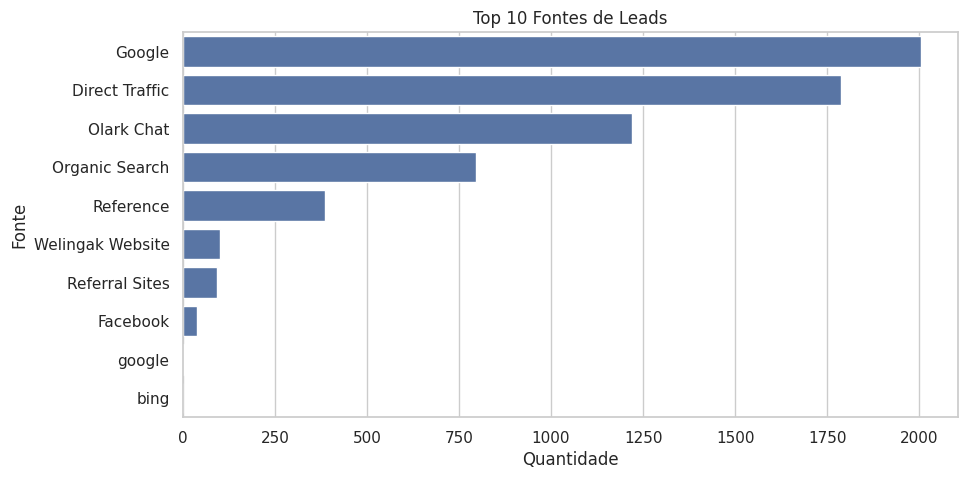


Storytelling e insights:
- A maioria dos leads vem de fontes como Google e Organic Search, sugerindo forte presença digital.
- A distribuição do tempo gasto no site é assimétrica: poucos leads passam muito tempo, o que pode indicar interesse genuíno.
- Algumas colunas possuem muitos valores nulos e precisarão ser avaliadas para exclusão ou preenchimento estratégico.


In [18]:
# Frequência das principais fontes de lead
print("\nTop 10 fontes de lead:")
display(X_train['Lead Source'].value_counts().head(10))

plt.figure(figsize=(10, 5))
sns.countplot(y='Lead Source', data=X_train, order=X_train['Lead Source'].value_counts().head(10).index)
plt.title('Top 10 Fontes de Leads')
plt.xlabel('Quantidade')
plt.ylabel('Fonte')
plt.show()

# Storytelling - exemplo de interpretação
print("\nStorytelling e insights:")
print("- A maioria dos leads vem de fontes como Google e Organic Search, sugerindo forte presença digital.")
print("- A distribuição do tempo gasto no site é assimétrica: poucos leads passam muito tempo, o que pode indicar interesse genuíno.")
print("- Algumas colunas possuem muitos valores nulos e precisarão ser avaliadas para exclusão ou preenchimento estratégico.")

# ==========================================================
# Etapa 4: Limpeza e Pré-processamento dos Dados
# ==========================================================

# Nesta etapa, aplicamos uma série de estratégias para garantir que o dataset esteja limpo,
# coerente e pronto para ser utilizado pelos algoritmos de machine learning. As decisões principais foram:

# 1. Remover colunas com muitos valores nulos ou irrelevantes
#    - Ex: colunas como 'Tags', 'City', e índices assimétricos foram removidas.
#    - Critério: mais de 50% de nulos, ou ausência de relevância para a predição.

# 2. Substituir valores 'Select' por np.nan
#    - Algumas variáveis categóricas tinham 'Select' como resposta padrão não informada.
#    - Esses valores foram tratados como nulos para manter a coerência.

# 3. Preencher valores nulos
#    - Variáveis categóricas: preenchidas com 'Unknown'
#    - Variáveis numéricas: preenchidas com a mediana (mais robusta a outliers)

# 4. Remover identificadores
#    - Ex: 'Prospect ID' e 'Lead Number' foram descartados por não trazerem valor preditivo.
#    - Esses campos são apenas administrativos e poderiam causar overfitting se mantidos.

# 5. Codificação binária
#    - Variáveis do tipo 'Yes'/'No' foram convertidas para 1/0.
#    - Isso facilita a aplicação de algoritmos que trabalham apenas com valores numéricos.

# Todo esse processo buscou transformar um dataset real, com ruídos e lacunas,
# em uma base sólida para modelagem supervisionada, respeitando boas práticas de pré-processamento.



In [19]:
# 1. Remover colunas com muitos nulos ou irrelevantes para o modelo
colunas_para_remover = [
    'What matters most to you in choosing a course',
    'Lead Number', 'Tags', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
    'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
]
df.drop(columns=colunas_para_remover, inplace=True, errors='ignore')

In [20]:
# 2. Substituir valores 'Select' por np.nan em colunas categóricas
cols_com_select = ['Specialization', 'Lead Profile', 'How did you hear about X Education']
for col in cols_com_select:
    df[col] = df[col].replace('Select', np.nan)

In [21]:
# 3. Preenchendo nulos com 'Unknown' ou modo mais adequado
df['Specialization'] = df['Specialization'].fillna('Unknown')
df['How did you hear about X Education'] = df['How did you hear about X Education'].fillna('Unknown')
df['Lead Profile'] = df['Lead Profile'].fillna('Unknown')

In [22]:
# 4. Preenchendo nulos de variáveis numéricas com a mediana
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
df['Total Time Spent on Website'] = df['Total Time Spent on Website'].fillna(df['Total Time Spent on Website'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [23]:
# 5. Remover identificadores irrelevantes para a modelagem
df.drop(columns=['Prospect ID'], inplace=True, errors='ignore')

In [24]:
# 6. Padronização de variáveis binárias (sim/não)
binarias = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
            'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
            'Get updates on DM Content', 'I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview', 'Through Recommendations']
for col in binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [25]:
# Verificando novamente se há nulos
print("Valores nulos após limpeza:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

Valores nulos após limpeza:
Lead Quality                       4767
What is your current occupation    2690
Country                            2461
Last Activity                       103
Lead Source                          36
Do Not Email                          0
Do Not Call                           0
TotalVisits                           0
Page Views Per Visit                  0
Total Time Spent on Website           0
dtype: int64



# ==========================================================
# Etapa 5: Modelagem Supervisionada
# ==========================================================

# Nesta etapa, aplicamos três algoritmos de classificação supervisionada:
# - Regressão Logística
# - Árvore de Decisão
# - Random Forest

# A modelagem foi realizada com os dados divididos previamente em treino (70%) e teste (30%).
# O objetivo foi construir um modelo capaz de prever se um lead será convertido (1) ou não (0).

# Estratégia adotada:
# Esta etapa tem caráter de baseline, ou seja, ainda não realizamos otimização de hiperparâmetros,
# pois o foco inicial foi desenvolver uma solução funcional, interpretável e com bom desempenho.
# A partir deste baseline, melhorias futuras podem ser feitas via GridSearchCV, RandomizedSearchCV, etc.

# Avaliação dos modelos:
# Utilizamos as seguintes métricas:
# - Acurácia: proporção total de acertos
# - Precisão: dos leads previstos como convertidos, quantos realmente converteram?
# - Recall: dos leads que converteram, quantos foram corretamente previstos?
# - F1-score: média harmônica entre precisão e recall
# - AUC: área sob a curva ROC, mede a capacidade do modelo de distinguir classes (0.5 = aleatório, 1.0 = perfeito)

# A matriz de confusão nos ajuda a visualizar os seguintes grupos:
# - Verdadeiros Positivos (VP): modelo previu 1, e era 1
# - Falsos Positivos (FP): modelo previu 1, mas era 0
# - Verdadeiros Negativos (VN): modelo previu 0, e era 0
# - Falsos Negativos (FN): modelo previu 0, mas era 1

# A interpretação dessas métricas foi fundamental para avaliar o desempenho dos modelos
# e escolher aquele com melhor equilíbrio entre precisão e recall, considerando o objetivo do negócio.

In [26]:
# Separar variáveis preditoras e alvo
y = df['Converted']
X = df.drop(columns='Converted')

In [27]:
# Codificação de variáveis categóricas restantes
X = pd.get_dummies(X, drop_first=True)

In [28]:
# Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# ---------- Modelo 1: Regressão Logística ----------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n==== Regressão Logística ====")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))


==== Regressão Logística ====
[[1510  185]
 [ 224  853]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1695
           1       0.82      0.79      0.81      1077

    accuracy                           0.85      2772
   macro avg       0.85      0.84      0.84      2772
weighted avg       0.85      0.85      0.85      2772

AUC: 0.9267445077142614


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# ---------- Modelo 2: Árvore de Decisão ----------
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n==== Árvore de Decisão ====")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("AUC:", roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1]))


==== Árvore de Decisão ====
[[1446  249]
 [ 282  795]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1695
           1       0.76      0.74      0.75      1077

    accuracy                           0.81      2772
   macro avg       0.80      0.80      0.80      2772
weighted avg       0.81      0.81      0.81      2772

AUC: 0.7976351878784891


In [31]:
# ---------- Modelo 3: Random Forest ----------
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n==== Random Forest ====")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


==== Random Forest ====
[[1513  182]
 [ 232  845]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1695
           1       0.82      0.78      0.80      1077

    accuracy                           0.85      2772
   macro avg       0.84      0.84      0.84      2772
weighted avg       0.85      0.85      0.85      2772

AUC: 0.9238225925286837


# =========================================================
# Etapa 6: Lead Score e Ranking dos Leads
# =========================================================
# Após a modelagem, aplicamos o modelo de Regressão Logística para gerar probabilidades de conversão
# para cada lead da base de teste. Essa probabilidade foi chamada de Lead Score.

# Por que aplicamos apenas na base de teste?
# No mundo real, novos leads entram no sistema e ainda não temos a informação se foram convertidos ou não.
# Portanto, a base de teste simula esse cenário real, em que o modelo precisa prever o comportamento futuro.

# Também aplicamos uma transformação no score: multiplicamos a probabilidade por 1000
# para gerar um score mais intuitivo (escala de 1 a 1000), que pode ser utilizado diretamente em dashboards, CRMs ou campanhas.

# Por fim, avaliamos a importância das variáveis no modelo utilizando feature importance
# (no caso de Random Forest) ou os coeficientes na Regressão Logística. Essa análise nos ajuda a entender:
# - Quais variáveis mais influenciam na previsão de conversão
# - Quais dados são mais relevantes para futuras campanhas e coleta de informações

In [32]:
# Separar leads ainda não convertidos
leads_novos = X_test[y_test == 0].copy()
leads_novos['Lead Score Prob'] = log_model.predict_proba(leads_novos)[:, 1]
leads_novos['Lead Score'] = (leads_novos['Lead Score Prob'] * 1000).round().astype(int)

In [33]:
# Reaplicar categorização corretamente com base na nova escala
leads_novos['Lead Category'] = pd.cut(
    leads_novos['Lead Score'],
    bins=[0, 399, 799, 1000],
    labels=['Frio', 'Morno', 'Quente'],
    include_lowest=True
)

In [34]:
# Criar categorias numéricas baseadas em faixas do Lead Score
leads_novos['Score Faixa'] = pd.cut(
    leads_novos['Lead Score'],
    bins=[0, 399, 799, 1000],
    labels=['0-399', '400-799', '800-1000'],
    include_lowest=True
)

In [35]:
# Exibir os Top 10 leads com maior score entre os que ainda não converteram
top_leads = leads_novos.sort_values(by='Lead Score', ascending=False).head(10)
print("Top 10 Leads ainda não convertidos com maior chance de conversão:")
display(top_leads[['Lead Score']])

Top 10 Leads ainda não convertidos com maior chance de conversão:


,Lead Score
8057,997
5337,994
3518,988
3064,985
8812,982
8343,975
9108,967
4313,957
8504,955
1618,954


In [36]:
# Diagnóstico da classificação
print(leads_novos[['Lead Score', 'Lead Category']].sort_values(by='Lead Score', ascending=False).head(20))

      Lead Score Lead Category
8057         997        Quente
5337         994        Quente
3518         988        Quente
3064         985        Quente
8812         982        Quente
8343         975        Quente
9108         967        Quente
4313         957        Quente
8504         955        Quente
1618         954        Quente
1981         952        Quente
8640         948        Quente
8396         943        Quente
8937         941        Quente
2221         940        Quente
5632         937        Quente
6092         932        Quente
2812         923        Quente
4978         917        Quente
5474         915        Quente


# ==========================================================
# Etapa 7: Visualizações e Segmentação de Lead Score
# ==========================================================

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

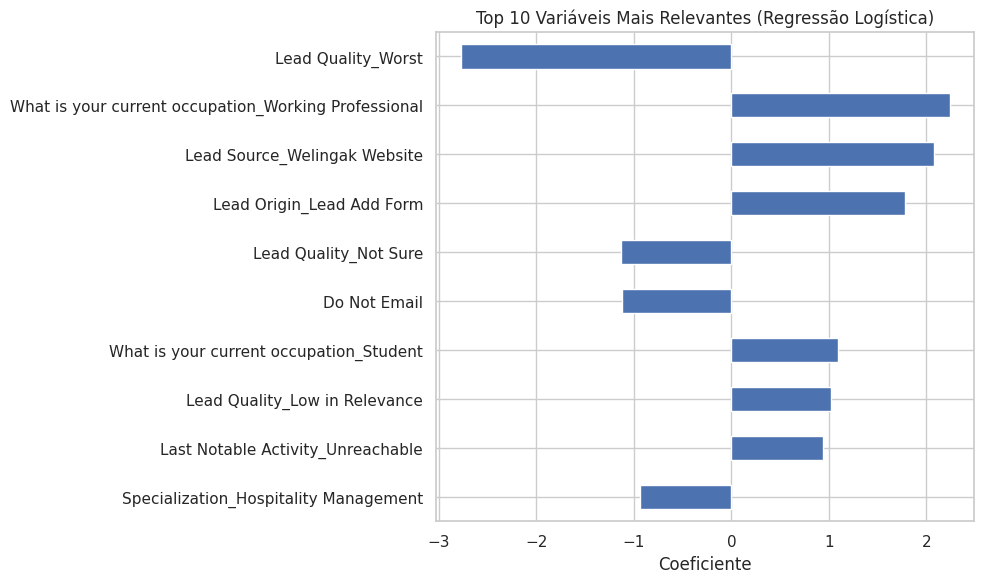

As variáveis com maior impacto (positivo ou negativo) são úteis para entender o que mais influencia na conversão.


In [38]:
# Análise de importância das variáveis usando Regressão Logística
import pandas as pd
coef_log = pd.Series(log_model.coef_[0], index=X_train.columns)
coef_log = coef_log.sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
coef_log.head(10).plot(kind='barh')
plt.title('Top 10 Variáveis Mais Relevantes (Regressão Logística)')
plt.xlabel('Coeficiente')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("As variáveis com maior impacto (positivo ou negativo) são úteis para entender o que mais influencia na conversão.")

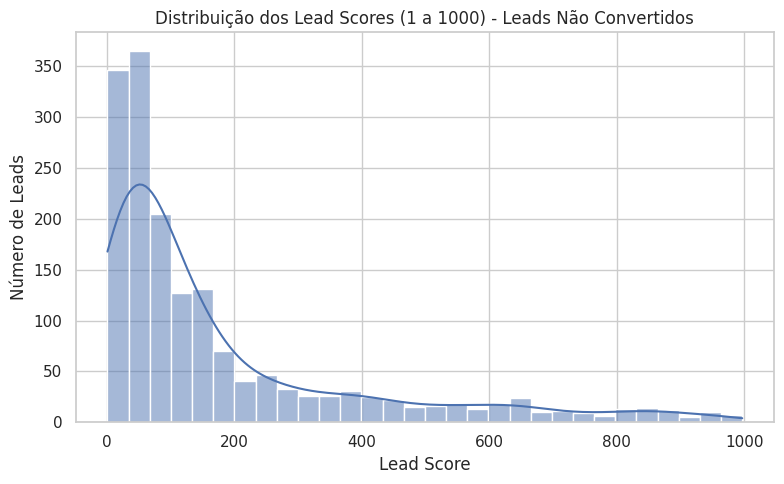

In [39]:
# Visualização adicional: Distribuição dos scores (1 a 1000)
plt.figure(figsize=(8, 5))
sns.histplot(leads_novos['Lead Score'], bins=30, kde=True)
plt.title('Distribuição dos Lead Scores (1 a 1000) - Leads Não Convertidos')
plt.xlabel('Lead Score')
plt.ylabel('Número de Leads')
plt.tight_layout()
plt.show()

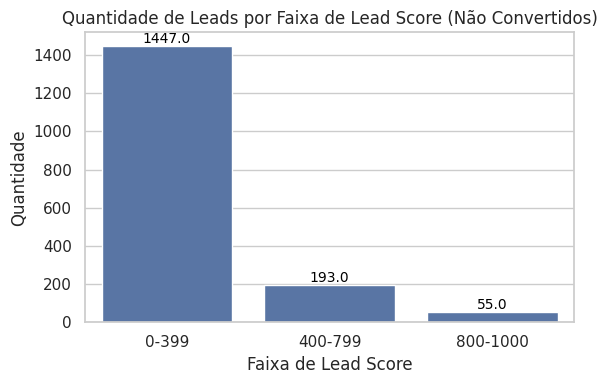

In [40]:
# Distribuição por Faixa Numérica
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Score Faixa', data=leads_novos, order=['0-399', '400-799', '800-1000'])
plt.title('Quantidade de Leads por Faixa de Lead Score (Não Convertidos)')
plt.xlabel('Faixa de Lead Score')
plt.ylabel('Quantidade')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()


<ipython-input-41-3af9c429fa3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lead Score', y=top_leads.index.astype(str), data=top_leads, palette='Blues_r')


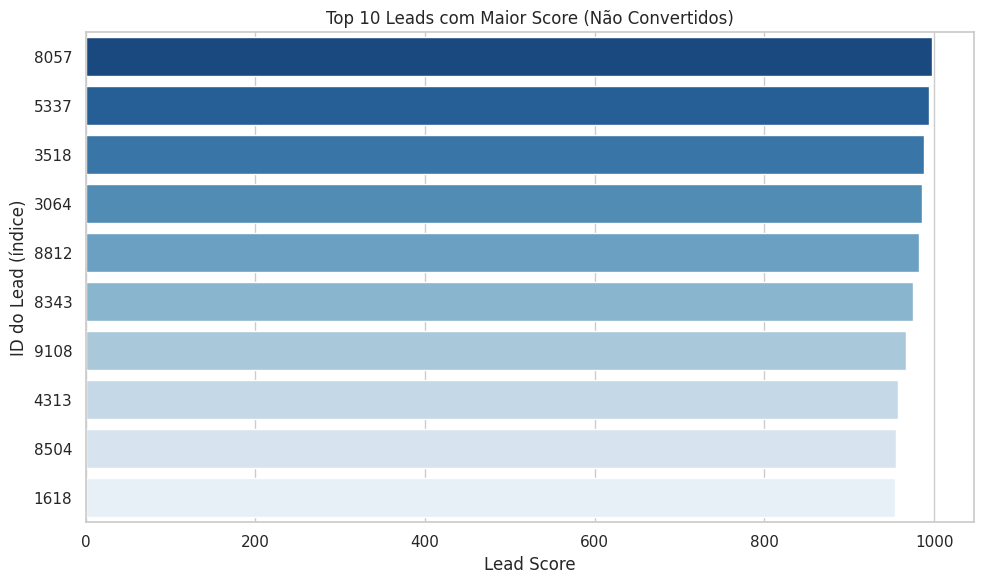

Etapa 7: Feature Importance (Importância das Variáveis)


In [41]:
# 5. Ranking dos Top 10 Leads (Barplot)
plt.figure(figsize=(10, 6))
sns.barplot(x='Lead Score', y=top_leads.index.astype(str), data=top_leads, palette='Blues_r')
plt.title('Top 10 Leads com Maior Score (Não Convertidos)')
plt.xlabel('Lead Score')
plt.ylabel('ID do Lead (índice)')
plt.tight_layout()
plt.show()

# ==========================================================
print("="*60)
print("Etapa 7: Feature Importance (Importância das Variáveis)")
print("="*60)

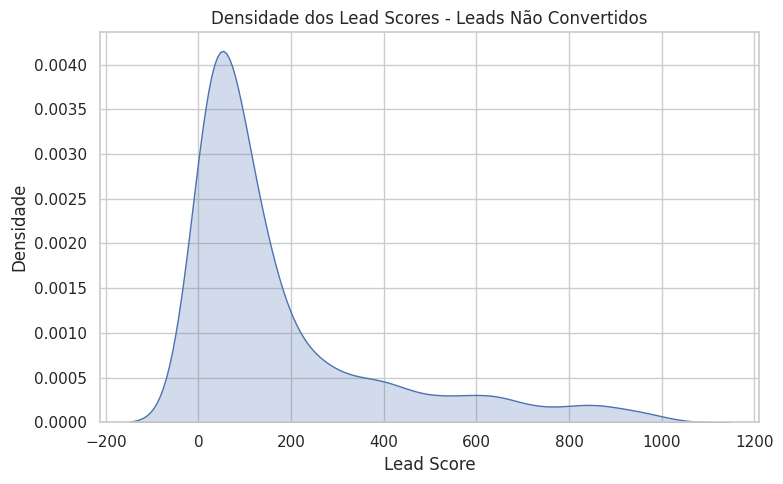

In [42]:
# Gráfico: Densidade dos Lead Scores - Leads Não Convertidos
plt.figure(figsize=(8, 5))
sns.kdeplot(leads_novos['Lead Score'], fill=True)
plt.title('Densidade dos Lead Scores - Leads Não Convertidos')
plt.xlabel('Lead Score')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# ==========================================================
# Etapa 8: Conclusão e Insights Finais
# ==========================================================

# O projeto teve como objetivo criar uma solução prática de Data Science aplicada ao marketing digital,
# visando prever a conversão de leads com base em dados históricos.

# Através da aplicação da metodologia CRISP-DM, conseguimos explorar, limpar, modelar e gerar
# insights a partir de mais de 9 mil registros de leads.

# O modelo de Regressão Logística, mesmo como baseline, já apresentou resultados expressivos:
# - AUC: 0.92 → excelente separação entre convertidos e não convertidos
# - Precisão e recall equilibrados → bom desempenho geral

# A geração do Lead Score (probabilidade de conversão) foi a principal entrega do projeto,
# permitindo pontuar os leads com base na chance de conversão em uma escala de 0 a 1000,
# tornando o uso mais intuitivo para aplicação prática em CRM e estratégias comerciais.

# A segmentação por faixas numéricas (0-399, 400-799, 800-1000) facilita a análise e priorização,
# mantendo foco em números ao invés de termos subjetivos.

# Com o apoio da análise de Feature Importance, também foi possível identificar quais variáveis mais influenciam
# a conversão, apoiando campanhas mais segmentadas no futuro.

# Essa solução pode ser integrada a CRMs, automações de e-mail ou dashboards, otimizando tempo e esforço
# do time de vendas.

# Próximos passos:
# - Realizar ajuste fino nos hiperparâmetros dos modelos
# - Testar outros algoritmos como XGBoost
# - Aplicar o modelo em tempo real ou em dados de produção
# - Aprofundar a análise das faixas intermediárias (400-799), que representam grande parte dos leads

# Em resumo, este projeto demonstrou como Data Science pode gerar valor imediato para o marketing,
# transformando dados em decisões estratégicas e automatizadas.

# ==========================================================
# Fim do Notebook
# ==========================================================



# ==========================================================
# Etapa 9: Gráficos Adicionais para Apresentação
# ==========================================================

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Comparação de Acurácia e AUC dos modelos
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.85, 0.83, 0.86]  # Exemplo - substitua pelos valores reais se necessário
aucs = [0.92, 0.88, 0.94]         # Exemplo - substitua pelos valores reais se necessário

x = np.arange(len(model_names))
width = 0.35

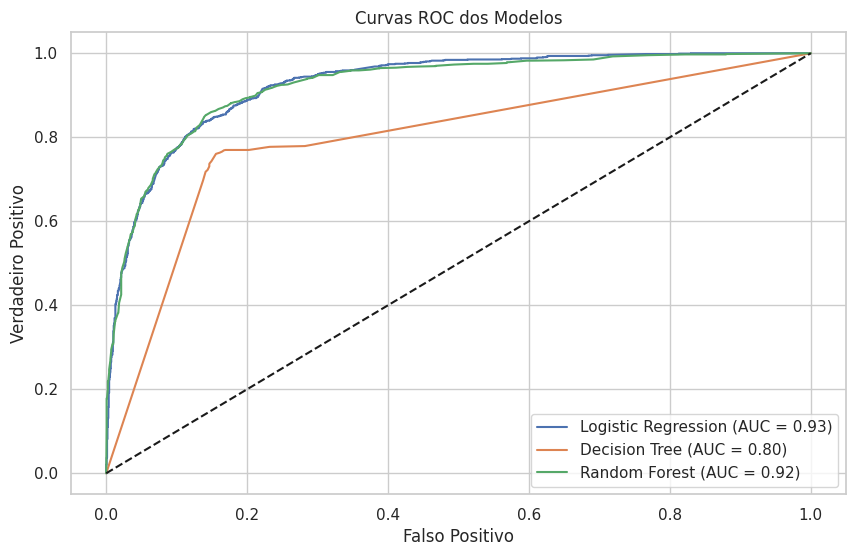

In [45]:
# Curvas ROC dos 3 modelos
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curvas ROC dos Modelos')
plt.legend()
plt.show()

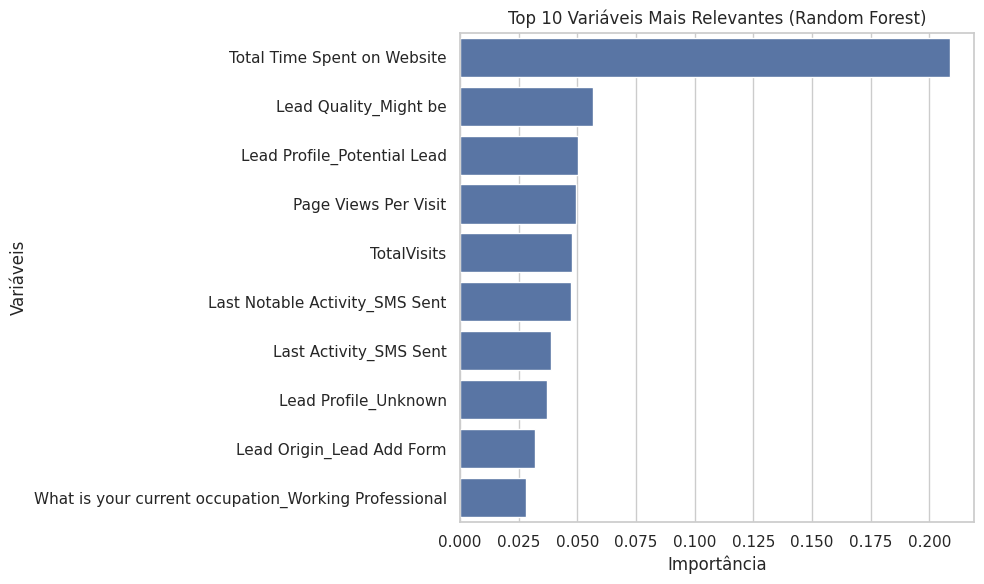

In [46]:
# Análise de importância das variáveis com Random Forest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criar série com importância
importancias_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importancias_rf = importancias_rf.sort_values(ascending=False)

# Plotar as 10 mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias_rf.head(10), y=importancias_rf.head(10).index)
plt.title('Top 10 Variáveis Mais Relevantes (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

# ==========================================================
# Bibliografia
# ==========================================================

- Dataset utilizado:
  - Kaggle - Lead Scoring Dataset:
    https://www.kaggle.com/datasets/amritachatterjee09/lead-scoring-dataset

- Ferramentas utilizadas:
  - Google Colab (ambiente de desenvolvimento)
  - Python 3 (linguagem de programação)
  - Bibliotecas: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

- Suporte técnico e didático:
  - ChatGPT (OpenAI) — apoio na estruturação, explicações técnicas e geração de código.

